# Preprocessing

In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim

In [2]:
matplotlib.rcParams['figure.figsize'] = 8,6

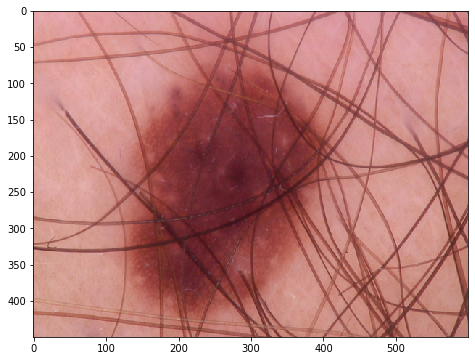

In [3]:
# Sample image
img = cv2.imread('images/ISIC_0024779.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

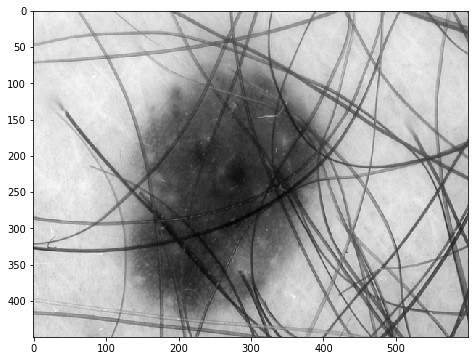

In [4]:
# Image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')

## Median filter

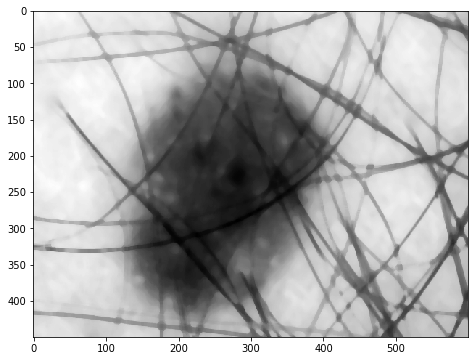

In [5]:
# Median filtering
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
# Aperture linear size; it must be odd and greater than 1
ksize = 9
img_blurred = cv2.medianBlur(img_gray, ksize)
plt.imshow(img_blurred, 'gray')

## Artefact removal using the DullRazor technique

### 1) Dilate and erode the image to remove small details

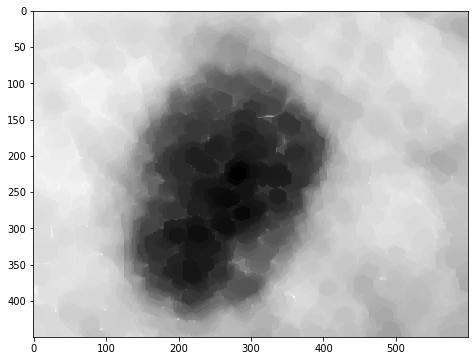

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

img_dilated = cv2.dilate(img_gray, kernel, iterations=5)
img_eroded = cv2.erode(img_dilated, kernel, iterations=5)

plt.imshow(img_eroded, 'gray')

### 2) Calculate the difference between acquired image and the original grayscale image

uint8


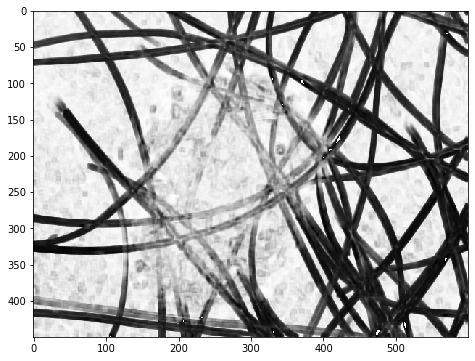

In [7]:
# Calculates the Structural Similarity Index (SSIM)
# Difference image is also returned
(score, img_diff) = compare_ssim(img_eroded, img_gray, full=True)

img_diff = (img_diff * 255).astype("uint8")
print(img_diff.dtype)
# print("SSIM: {}".format(score))

plt.imshow(img_diff, 'gray')

### 3) Dilate and erode the mask of difference to remove noise

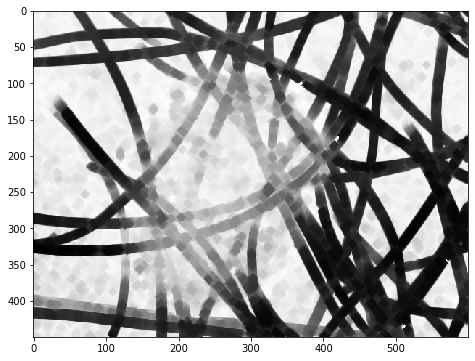

In [8]:
mask_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

img_dilated_mask = cv2.dilate(img_diff, mask_kernel, iterations=3)
img_eroded_mask = cv2.erode(img_dilated_mask, mask_kernel, iterations=5)

plt.imshow(img_eroded_mask, 'gray')

### 4) Create binary mask containing the location of the artefacts

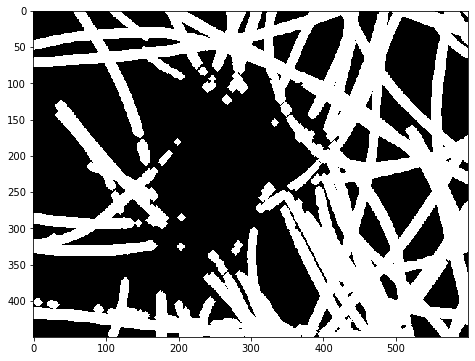

In [9]:
# Creating binary image using Otsu method

#ret, img_bin_mask = cv2.threshold(img_diff, 0, 255, cv2.THRESH_OTSU)
ret, img_bin_mask = cv2.threshold(img_eroded_mask, 0, 255, cv2.THRESH_OTSU)
img_bin_mask_inv = cv2.bitwise_not(img_bin_mask)
plt.imshow(img_bin_mask_inv, 'gray')

### 5) Replace the pixels covered by the mask by the pixels corresponding to the original image

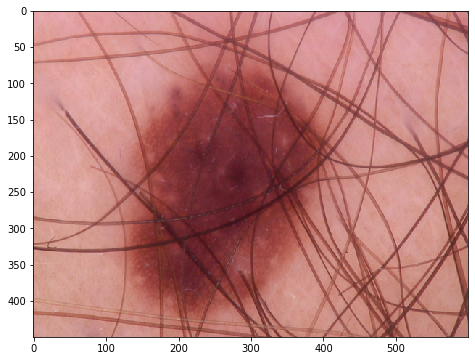

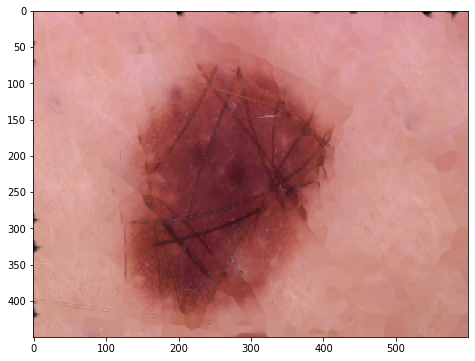

In [12]:
img_copy = np.copy(img)
img_copy[img_bin_mask==0] = 0

img_ip = cv2.inpaint(img_copy,img_bin_mask_inv,3,cv2.INPAINT_NS)
plt.figure() 
plt.imshow(img)
plt.figure() 
plt.imshow(img_ip)

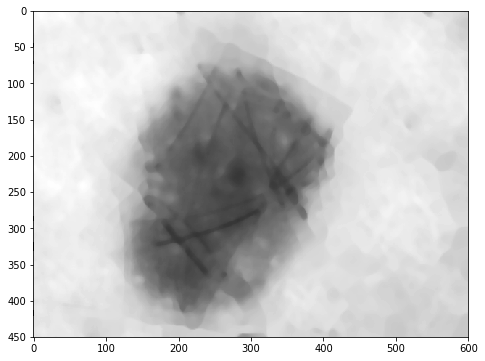

In [29]:
# Additional median filtering
ksize = 9

img_final = cv2.medianBlur(img_ip, ksize)
plt.figure();
plt.imshow(img_final)

img_final_grayscale = cv2.cvtColor(img_final, cv2.COLOR_RGB2GRAY)
plt.figure();
plt.imshow(img_final_grayscale, 'gray')

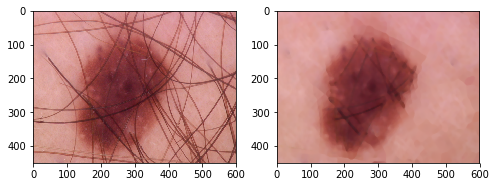

In [31]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img)

f.add_subplot(1,2, 2)
plt.imshow(img_final)

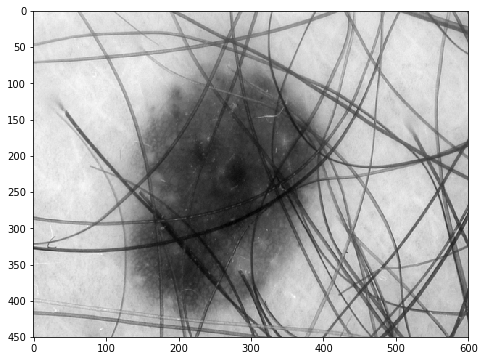

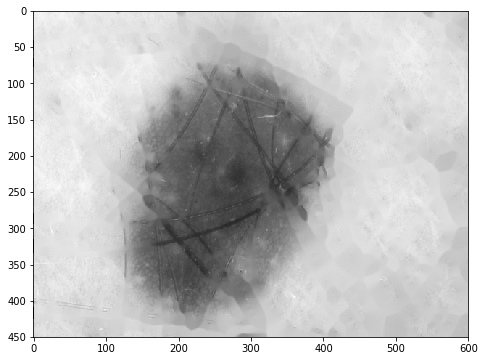

In [83]:
# Masking on grayscale image
img_copy_gray = np.copy(img_gray)
img_copy_gray[img_bin_mask==0] = 0

img_ip_gray = cv2.inpaint(img_copy_gray,img_bin_mask_inv,3,cv2.INPAINT_TELEA)
plt.figure() 
plt.imshow(img_gray, 'gray')
plt.figure() 
plt.imshow(img_ip_gray, 'gray')

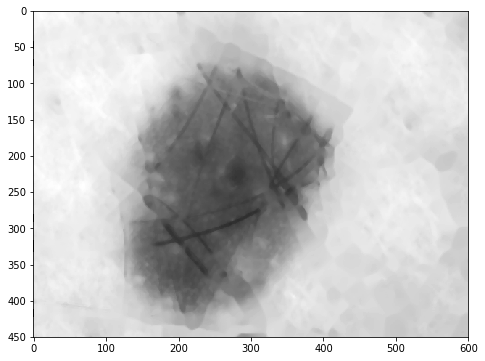

In [84]:
# Additional median filtering
ksize = 5

img_final_g = cv2.medianBlur(img_ip_gray, ksize)
plt.figure();
plt.imshow(img_final_g, 'gray')

# Examples

In [19]:
import preprocessing as pp
import importlib

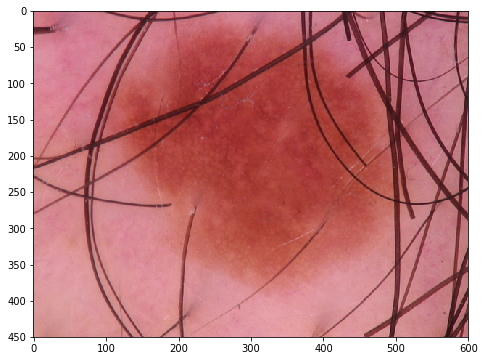

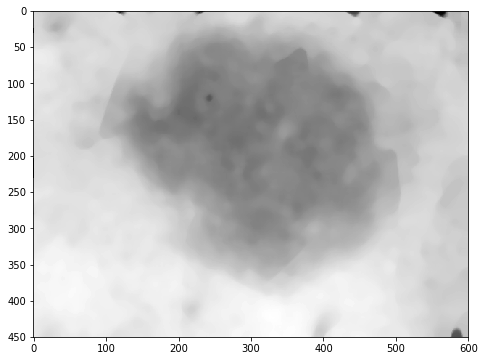

In [20]:
ii = cv2.imread('images/ISIC_0025212.jpg')
ii = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB)
out = pp.preprocess(ii)
plt.figure()
plt.imshow(ii)
plt.figure()
plt.imshow(out, 'gray')

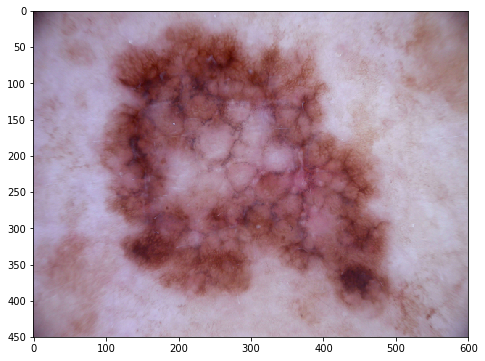

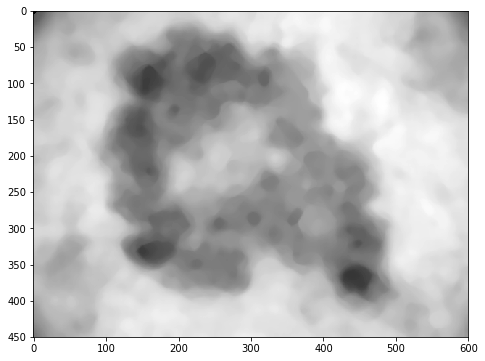

In [21]:
importlib.reload(pp)
ii = cv2.imread('images/ISIC_0033834.jpg')
ii = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB)
out = pp.preprocess(ii)
plt.figure()
plt.imshow(ii)
plt.figure()
plt.imshow(out, 'gray')

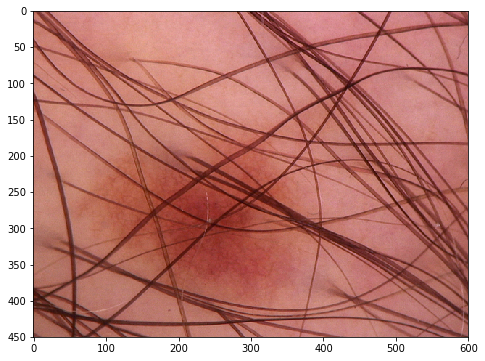

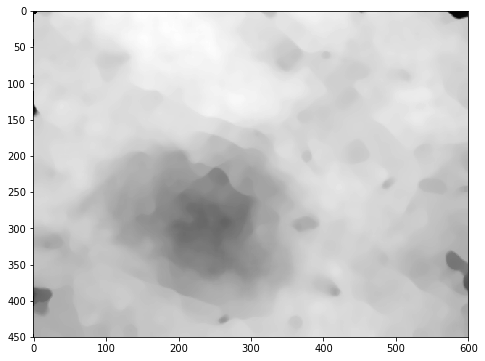

In [22]:
importlib.reload(pp)
ii = cv2.imread('images/ISIC_0025116.jpg')
ii = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB)
out = pp.preprocess(ii)
plt.figure()
plt.imshow(ii)
plt.figure()
plt.imshow(out, 'gray')

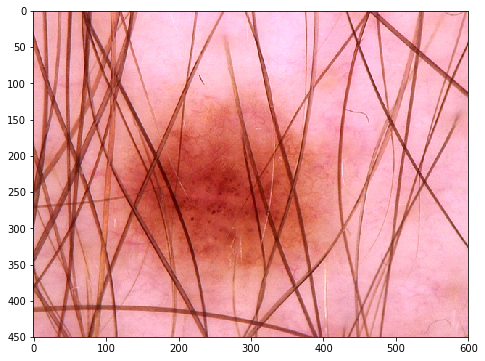

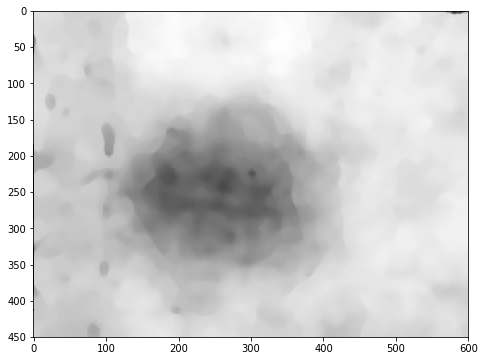

In [23]:
importlib.reload(pp)
ii = cv2.imread('images/ISIC_0025878.jpg')
ii = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB)
out = pp.preprocess(ii)
plt.figure()
plt.imshow(ii)
plt.figure()
plt.imshow(out, 'gray')

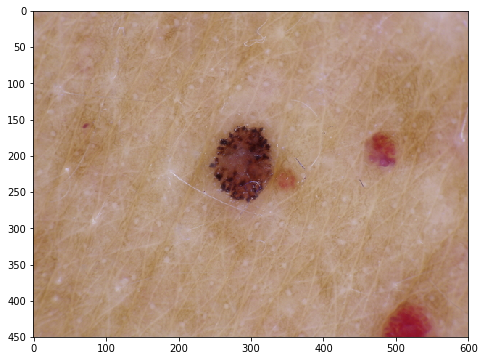

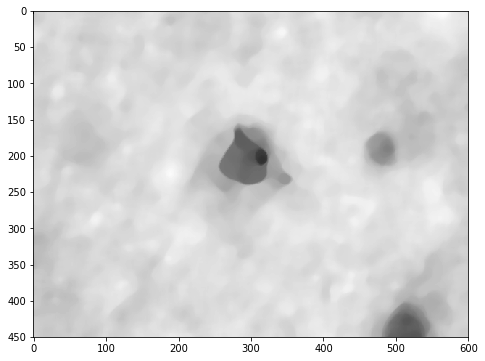

In [24]:
importlib.reload(pp)
ii = cv2.imread('images/ISIC_0032258.jpg')
ii = cv2.cvtColor(ii, cv2.COLOR_BGR2RGB)
out = pp.preprocess(ii)
plt.figure()
plt.imshow(ii)
plt.figure()
plt.imshow(out, 'gray')